In [1]:
f = lambda x: x**4 + 12*x + 1/x

In [2]:

## USING SYMBOLIC DIFFERENTIATION
import sympy

In [8]:
x = 11.0

x_sym = sympy.symbols('x')

f_sym = f(x_sym)

df_sym = sympy.diff(f_sym)

f_sym, df_sym

(x**(-1.0) + x**4 + 12*x, -1.0/x**2.0 + 4*x**3 + 12)

In [6]:
f = sympy.lambdify(x_sym, f_sym) # lambdify converts sympy expressions to something that can be evaluated

df = sympy.lambdify(x_sym, df_sym)

f(x), df(x)

(14773.09090909091, 5335.99173553719)

In [7]:
d2f = sympy.diff(df_sym)
d2f

12*x**2 + 2/x**3

In [9]:
import jax

df = jax.grad(f)
df

<function _lambdifygenerated(x)>

In [10]:
df(x)

Array(5335.9917, dtype=float32)

In [11]:
import numpy as np
import matplotlib.pyplot as plt

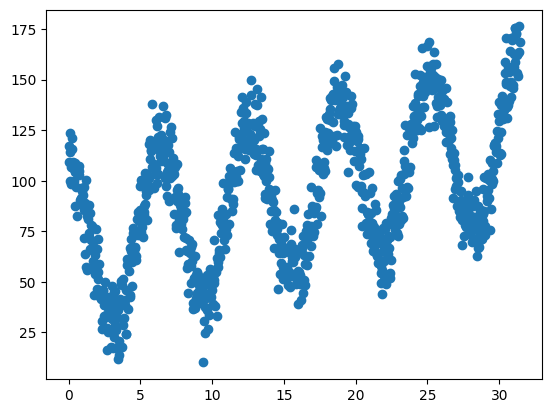

In [12]:
x = np.linspace(0, 10 * np.pi, num=1000)
e = np.random.normal(scale=10, size=x.size)
y = 65.0 + 1.8*x + 40*np.cos(x) + e

plt.scatter(x,y)

In [22]:
import jax.numpy as jnp

xt = jnp.array(x)

yt = jnp.array(y)

lr = 1e-2

model_parameters = jnp.array([1, 1], dtype=jnp.float32)

def model(theta, x):
    w, b = theta

    return w * x + b

def loss_fn(model_parameters, x, y):
    prediction = model(model_parameters, x)

    return jnp.mean((prediction - y)**2), prediction


grads_fn = jax.grad(loss_fn, has_aux=True) # has auxilary returns

grads,_ = grads_fn(model_parameters, xt, yt)
model_parameters -= lr * grads


In [15]:
grads, model_parameters

(Array([-2550.3665 ,  -153.83813], dtype=float32),
 Array([26.503664 ,  2.5383813], dtype=float32))

In [17]:
def dist(order, x, y):
    return jnp.power(jnp.sum(jnp.abs(x - y)**order), 1.0/order)

In [18]:
dist_d_x = jax.grad(dist, argnums=1)

dist_d_x(1, jnp.array([1.0, 1.0, 1.0]), jnp.array([2.0, 2.0, 2.0]))

Array([-1., -1., -1.], dtype=float32)

In [19]:
dist_d_xy = jax.grad(dist, argnums=(1,2))

dist_d_xy(1, jnp.array([1.0, 1.0, 1.0]), jnp.array([2.0, 2.0, 2.0]))

(Array([-1., -1., -1.], dtype=float32), Array([1., 1., 1.], dtype=float32))

In [23]:
grads_fn = jax.value_and_grad(loss_fn, has_aux=True)

(loss, preds), grads = grads_fn(model_parameters, xt, yt)

model_parameters -= lr * grads